In [1]:
%pip install pandas
%pip install torchvision 

%pip install tqdm


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: C:\Users\patel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: C:\Users\patel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: C:\Users\patel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, datasets
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import cv2
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn.modules.loss import BCEWithLogitsLoss
from torch.optim import lr_scheduler
from tqdm import tqdm
import os

In [3]:
combined = []
dirname = 'combinedarr/'
ext = ('.npy')
for files in os.listdir(dirname):
    if files.endswith(ext):
        string = "combinedarr/"+files
        individual = np.load(string,allow_pickle=True)
        combined.append(individual)
        print(string)
# listdir("")

combinedarr/abc_combinedarr.npy
combinedarr/banknotes_combinedarr.npy
combinedarr/bingo_combinedarr.npy
combinedarr/blau_combinedarr.npy
combinedarr/bread_combinedarr.npy
combinedarr/brokenegg_combinedarr.npy
combinedarr/cat_combinedarr.npy
combinedarr/cherryblossom_combinedarr.npy
combinedarr/cliffjump_combinedarr.npy
combinedarr/dollar_combinedarr.npy
combinedarr/europe_combinedarr.npy
combinedarr/flfl_combinedarr.npy
combinedarr/frog_combinedarr.npy
combinedarr/glizzy_combinedarr.npy
combinedarr/grass_combinedarr.npy
combinedarr/house_combinedarr.npy
combinedarr/icefestival_combinedarr.npy
combinedarr/idk_combinedarr.npy
combinedarr/italianvillage_combinedarr.npy
combinedarr/kites_combinedarr.npy
combinedarr/monalisa_combinedarr.npy
combinedarr/nebula_combinedarr.npy
combinedarr/night_combinedarr.npy
combinedarr/peacock_combinedarr.npy
combinedarr/picnic_combinedarr.npy
combinedarr/pink_combinedarr.npy
combinedarr/raspberry_combinedarr.npy
combinedarr/redbridge_combinedarr.npy
combi

In [4]:
finalcombined = combined[0]
for i in range(1,len(combined), 1):
    finalcombined = np.concatenate((finalcombined, combined[i]))

In [5]:
len(finalcombined)

9089

In [6]:
data = [c[0] for c in (finalcombined[:,0:1])]
label = finalcombined[:,1]

In [7]:
for i in range(len(data)):
    data[i] = cv2.resize(data[i], dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
    data[i] = data[i].transpose(2,0,1)

In [8]:
y = []
for i in label:
    y.append([i])

In [9]:
print(data[300].shape)
print(sum(label))

(3, 224, 224)
526


In [10]:
tensor_x = torch.Tensor(data)

C:\Users\patel\AppData\Local\Temp\ipykernel_21684\2576278261.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:264.)
  tensor_x = torch.Tensor(data)


In [11]:
tensor_x = torchvision.transforms.functional.normalize(tensor_x, mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])

In [12]:
tensor_y = torch.Tensor(y)

In [13]:
my_dataset = TensorDataset(tensor_x,tensor_y)

In [14]:
test_size =int((len(my_dataset))/10)
train_size = len(my_dataset)-test_size

In [15]:
train_data, test_data = torch.utils.data.random_split(my_dataset, [train_size, test_size])

In [16]:
my_dataloader = DataLoader(train_data, shuffle = True, batch_size=16)
test_dataloader = DataLoader(test_data, shuffle = True, batch_size=16)

In [18]:
def make_train_step(model, optimizer, loss_fn):
  def train_step(x,y):
    #make prediction
    yhat = model(x)
    #enter train mode
    model.train()
    #compute loss
    loss = loss_fn(yhat,y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    #optimizer.cleargrads()

    return loss
  return train_step

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = models.resnet18(pretrained=True)

#freeze all params
for params in model.parameters():
  params.requires_grad_ = False

#add a new final layer
nr_filters = model.fc.in_features  #number of input features of last layer
model.fc = nn.Linear(nr_filters, 1)

model = model.to(device)

C:\Users\patel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\patel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [20]:
#loss
loss_fn = BCEWithLogitsLoss() #binary cross entropy with sigmoid, so no need to use sigmoid in the model #~0.15
# loss_fn = nn.CrossEntropyLoss()
# loss_fn = nn.HingeEmbeddingLoss()
# loss_fn = nn.HingeLoss(task="binary")
#optimizer
optimizer = torch.optim.Adam(model.fc.parameters()) 

#train step
train_step = make_train_step(model, optimizer, loss_fn)

In [21]:
losses = []
val_losses = []

epoch_train_losses = []
epoch_test_losses = []

n_epochs = 10
early_stopping_tolerance = 3
early_stopping_threshold = 0.03

for epoch in range(n_epochs):
  epoch_loss = 0
  for i ,data in tqdm(enumerate(my_dataloader), total = len(my_dataloader)): #iterate ove batches
    x_batch , y_batch = data
    x_batch = x_batch.to(device) #move to gpu
    # y_batch = y_batch.unsqueeze(1).float() #convert target to same nn output shape
    # y_batch = y_batch.unsqueeze(1).float() 
    y_batch = y_batch.to(device) #move to gpu


    loss = train_step(x_batch, y_batch)
    epoch_loss += loss/len(my_dataloader)
    losses.append(loss)
    
  epoch_train_losses.append(epoch_loss)
  print('\nEpoch : {}, train loss : {}'.format(epoch+1,epoch_loss))

  #validation doesnt requires gradient
  with torch.no_grad():
    cum_loss = 0
    for x_batch, y_batch in test_dataloader:
      x_batch = x_batch.to(device)
      # y_batch = y_batch.unsqueeze(1).float() #convert target to same nn output shape
      # y_batch = y_batch.unsqueeze(1).float() 
      y_batch = y_batch.to(device)

      #model to eval mode
      model.eval()

      yhat = model(x_batch)
      val_loss = loss_fn(yhat,y_batch)
      cum_loss += loss/len(test_dataloader)
      val_losses.append(val_loss.item())


    epoch_test_losses.append(cum_loss)
    print('Epoch : {}, val loss : {}'.format(epoch+1,cum_loss))  
    
    best_loss = min(epoch_test_losses)
    
    #save best model
    if cum_loss <= best_loss:
      best_model_wts = model.state_dict()
    
    #early stopping
    early_stopping_counter = 0
    if cum_loss > best_loss:
      early_stopping_counter +=1

    if (early_stopping_counter == early_stopping_tolerance) or (best_loss <= early_stopping_threshold):
      print("/nTerminating: early stopping")
      break #terminate training
    
#load best model
model.load_state_dict(best_model_wts)

100%|██████████| 512/512 [06:54<00:00,  1.24it/s]



Epoch : 1, train loss : 0.15815818309783936
Epoch : 1, val loss : 0.7022765874862671


100%|██████████| 512/512 [05:57<00:00,  1.43it/s]



Epoch : 2, train loss : 0.11058538407087326
Epoch : 2, val loss : 0.019926119595766068
/nTerminating: early stopping


<All keys matched successfully>

In [22]:
torch.save(model, 'combinedarr/modelstatedict1127.pth')



In [26]:
%pip install torchinfo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: C:\Users\patel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [29]:
model.children

<bound method Module.children of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [267]:
import torchvision.models as models

model2 = torch.load('combinedarr/modelstatedict.pth')


In [270]:
import matplotlib.pyplot as plt 

def inference(data):
  data = cv2.resize(data, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  data = data.transpose(2,0,1)
  test_data = torch.Tensor(data)
  test_data = torchvision.transforms.functional.normalize(test_data, mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
  sample = torch.unsqueeze(test_data, dim=0).to(device)

  return torch.sigmoid(model2(sample))




In [116]:
data[0][0].shape

torch.Size([3, 224, 224])

In [259]:
testing = [c[0] for c in (combined[:,0:1])]
testing_label = combined[:,1]
# np.random.shuffle(combined)


In [122]:
def show(img_input, name):
    plt.figure(figsize = (15,15))
    plt.axis("off")
    plt.title(name)
    plt.imshow(img_input)
    plt.show()

In [140]:
len(test_data[0][0])

3

tensor([[0.2473]], grad_fn=<SigmoidBackward0>)


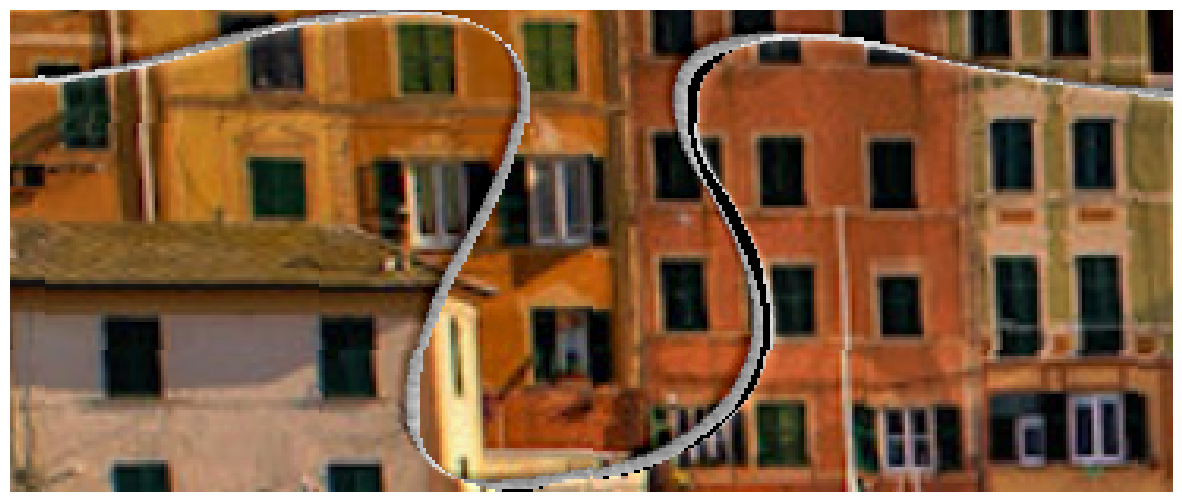

tensor([[0.1675]], grad_fn=<SigmoidBackward0>)


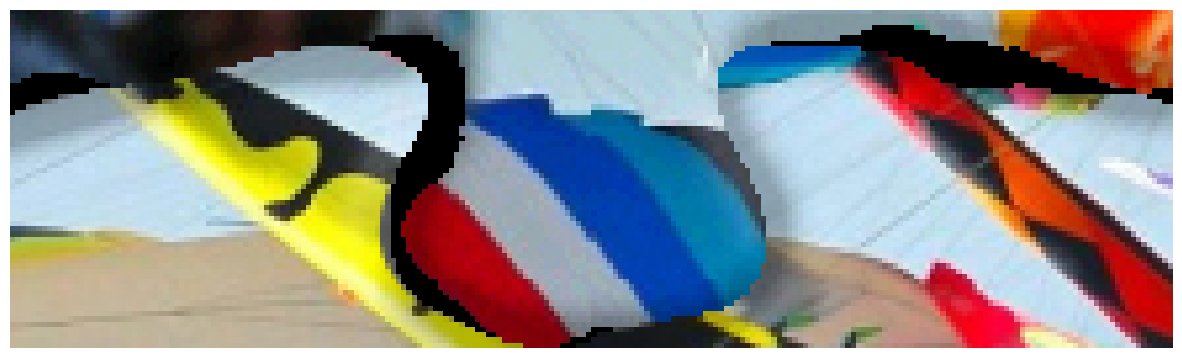

tensor([[0.1779]], grad_fn=<SigmoidBackward0>)


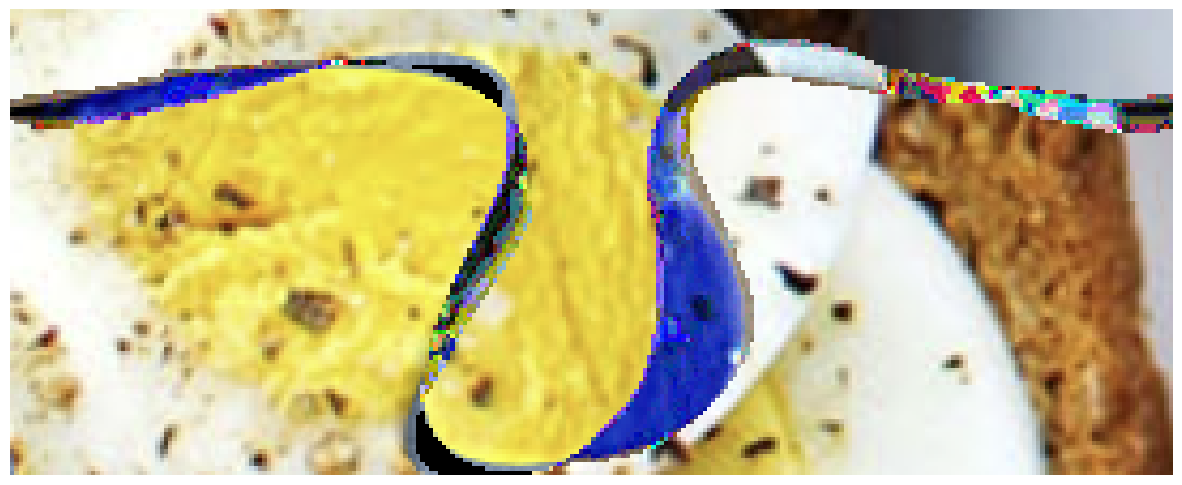

tensor([[0.3977]], grad_fn=<SigmoidBackward0>)


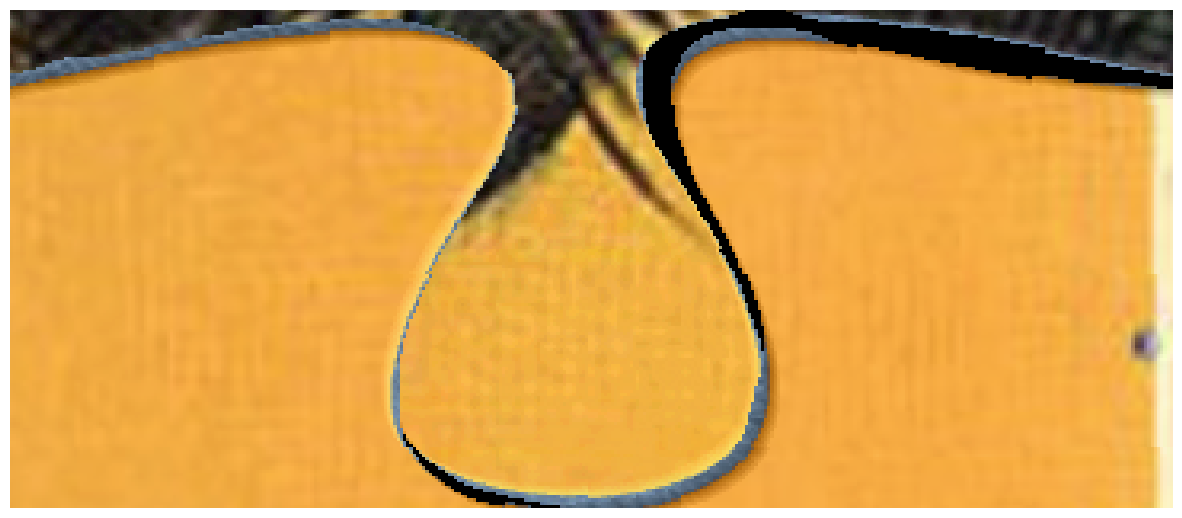

tensor([[0.3794]], grad_fn=<SigmoidBackward0>)


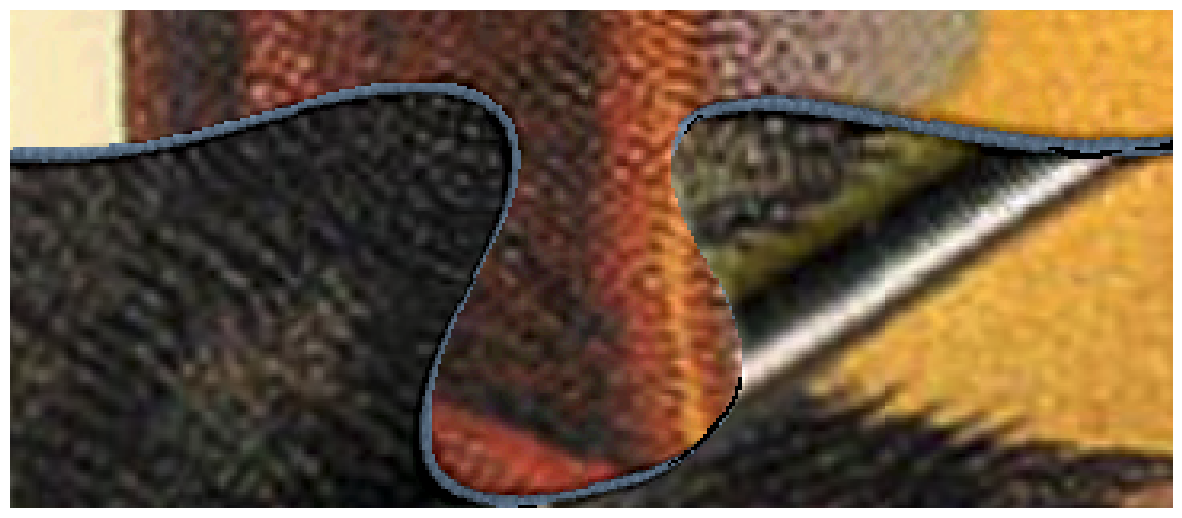

tensor([[0.5061]], grad_fn=<SigmoidBackward0>)


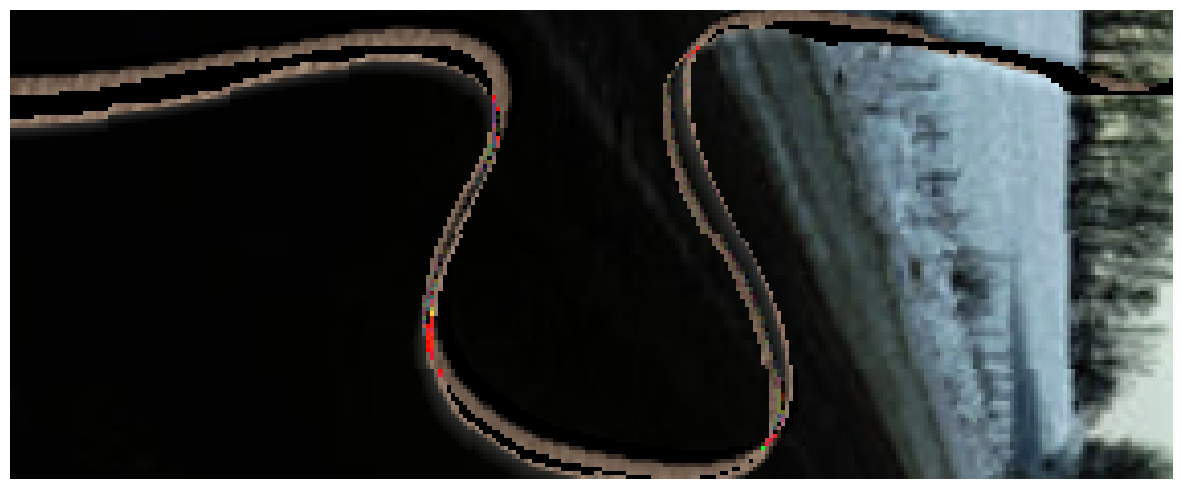

tensor([[0.2420]], grad_fn=<SigmoidBackward0>)


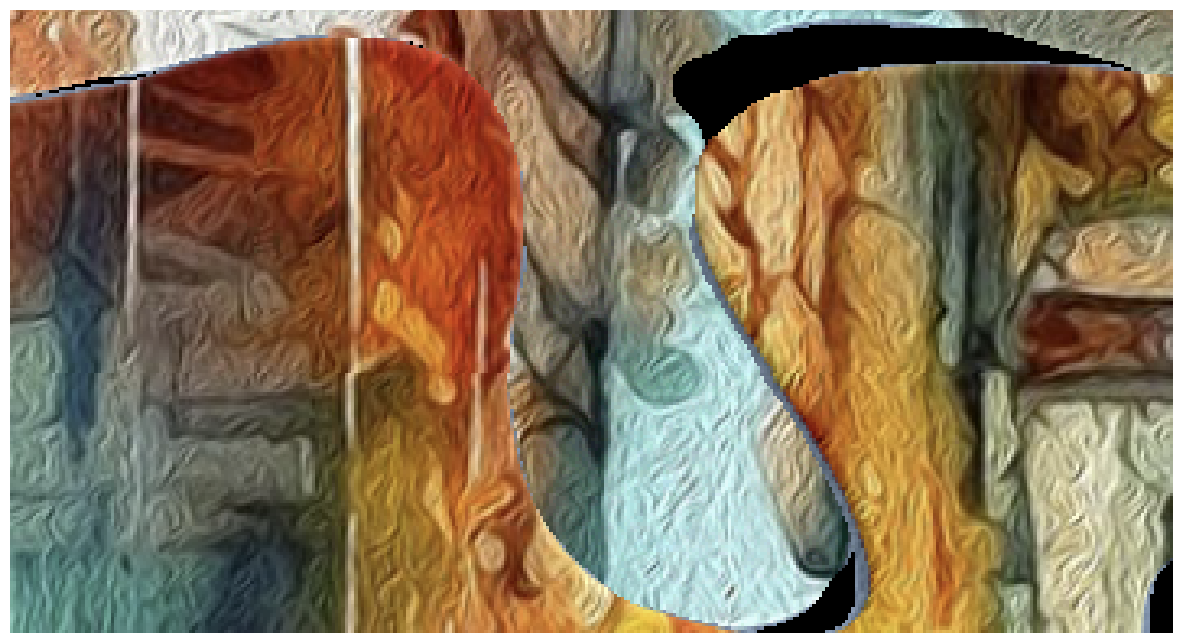

tensor([[0.1513]], grad_fn=<SigmoidBackward0>)


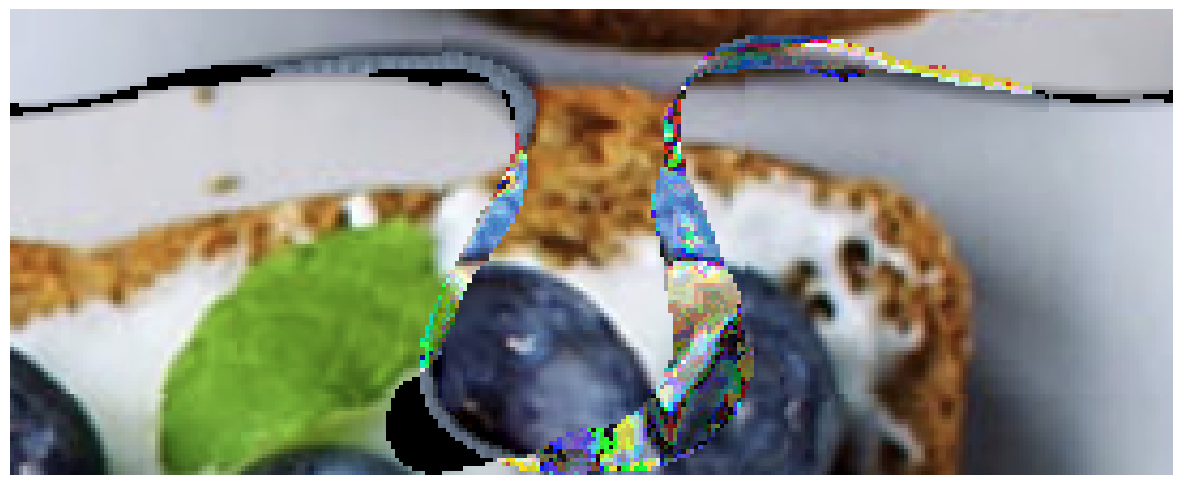

tensor([[0.1746]], grad_fn=<SigmoidBackward0>)


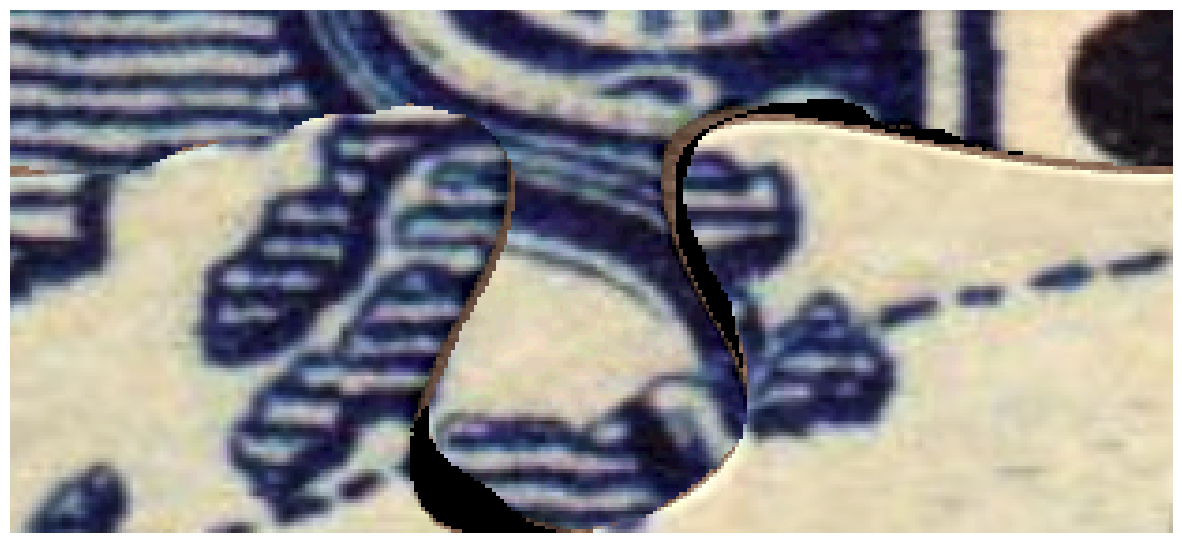

In [269]:
# ind = 101
for i in range(0,100,1):
    ind = i
    val = (inference(testing[ind]))
    if(val>0.1):
        print(val)
        show(testing[ind], "")